In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%ls data26

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 5086-07DB

 C:\Users\qwe\Documents\python_pbd\data26 디렉터리

2021-08-17  오전 09:21    <DIR>          .
2021-08-17  오전 09:21    <DIR>          ..
2021-07-19  오전 11:45                42 001.영업부 주간회의보고서 양식.txt
2021-07-19  오전 10:14               186 001.영업부 주간회의보고서.txt
2021-07-19  오전 11:45                42 002.생산부 주간회의보고서 양식.txt
2021-07-19  오전 10:14               175 002.생산부 주간회의보고서.txt
2021-07-19  오전 11:45                42 003.자재부 주간회의보고서 양식.txt
2021-07-19  오전 10:14               186 003.자재부 주간회의보고서.txt
2021-07-19  오전 11:45                46 004.인사관리부 주간회의보고서 양식.txt
2021-07-19  오전 10:14               172 004.인사관리부 주간회의보고서.txt
2021-07-19  오전 10:14           210,256 house_price(26).csv
2021-07-20  오후 12:00               719 report.txt
2021-08-17  오전 09:19             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2021-08-17  오전 09:21           266,230 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210630.csv
              12개 파일             480,259 바이트
               2개 디렉터리 

# 1. 두 데이터를 하나의 DataFrame으로 만들기

In [70]:
df1 = pd.read_csv('data26/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df1.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [123]:
df2 = pd.read_csv('data26/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210630.csv', encoding='cp949')
df2.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [124]:
df1_melt = df1.melt(id_vars='지역', var_name='기간', value_name='평당분양가격')
df1_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [125]:
df1_melt.columns=['지역명', '기간', '평당분양가격']
df1_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


In [126]:
df1_melt['연도'] = df1_melt['기간'].apply(lambda date: int(date.split('년')[0]))
df1_melt

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013
...,...,...,...,...
352,전북,2015년8월,6580,2015
353,전남,2015년8월,6289,2015
354,경북,2015년8월,7037,2015
355,경남,2015년8월,7665,2015


In [127]:
df1_melt['월'] = df1_melt['기간'].apply(lambda date: int(date.split('년')[-1].replace('월', '')))
df1_melt

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [128]:
df2['분양가격'] = pd.to_numeric(df2['분양가격(제곱미터)'], errors='coerce')

In [129]:
df2['평당분양가격'] = df2['분양가격']*3.3

In [130]:
df2['규모구분'] = df2['규모구분'].str.replace('전용면적', '')
df2['규모구분'] = df2['규모구분'].str.replace('초과', '~')
df2['규모구분'] = df2['규모구분'].str.replace('이하', '')
df2['규모구분'] = df2['규모구분'].str.replace('제곱미터', '㎡')
df2['규모구분'] = df2['규모구분'].str.replace(' ', '')

In [131]:
df2 = df2.drop(['분양가격(제곱미터)'], axis=1)
df2.head(1)

,지역명,규모구분,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3


In [132]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [138]:
df1_prepare = df1_melt[cols].copy()
df1_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


In [139]:
df2_prepare = df2.loc[df2['규모구분']=='모든면적', cols].copy()
df2_prepare

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
5840,전북,2021,6,8814.3
5845,전남,2021,6,10074.9
5850,경북,2021,6,10061.7
5855,경남,2021,6,10230.0


In [135]:
df = pd.concat([df1_prepare, df2_prepare], ignore_index=True)
df

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0
...,...,...,...,...
1525,전북,2021,6,8814.3
1526,전남,2021,6,10074.9
1527,경북,2021,6,10061.7
1528,경남,2021,6,10230.0


# 2. 1번에 만든 DataFrame을 이용하여 데이터 가공하기

In [147]:
df_group = df.groupby(['연도', '지역명',])['평당분양가격'].mean().unstack().round(2)
df_group

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.00,10855.00,6473.00,6168.00,6098.00,8080.00,8321.00,8111.00,18189.00,7601.00,8090.00,10204.00,5678.00,6282.00,7674.00,6365.00,6589.00
2014,6332.50,10509.08,6728.75,6536.50,7587.83,8286.08,8240.33,9180.17,18997.25,8085.33,8361.67,10074.83,5718.92,6362.33,7855.17,6681.58,6620.00
2015,6831.15,10489.11,7646.16,7035.06,7956.09,8706.72,8104.51,9633.27,19282.60,8641.23,9273.34,10276.85,6109.26,6623.29,7465.33,7024.49,6699.57
2016,7011.12,11220.00,7847.95,7360.65,8898.72,10310.02,8501.63,10429.92,20663.50,8860.50,10208.55,10532.50,6488.62,6417.95,9129.17,7330.68,6770.22
2017,7126.80,11850.00,8119.80,7794.90,9463.50,11455.80,9044.70,11577.90,21375.90,9135.30,11345.10,10736.70,7187.70,7057.80,10830.90,7456.20,6762.60
2018,7680.75,13185.97,9019.45,8505.20,9855.72,12075.80,10180.22,12997.87,22889.35,10354.85,10241.40,11273.90,7789.10,7625.75,11890.72,8012.68,7874.08
2019,8141.65,14468.85,9870.85,8856.65,11822.80,13852.03,11777.70,13116.40,26131.05,11078.92,10022.10,12634.88,7902.40,8196.65,12137.95,8606.95,7574.60
2020,9331.30,14383.32,10160.70,9544.97,12500.12,15145.08,11094.05,13247.58,26910.12,11355.30,12202.85,14674.00,8696.87,8317.10,14540.90,8856.10,7959.60
2021,9821.90,14243.35,10216.25,10133.75,13800.05,15451.15,11531.85,14318.70,28436.10,12533.40,14190.00,15432.45,9744.90,8762.60,21898.80,9165.20,8599.25


In [149]:
df_pivot_table = pd.pivot_table(df, index=['연도', '월'], columns='지역명', values='평당분양가격')
df_pivot_table

지역명           강원       경기       경남       경북       광주       대구       대전  \
연도   월                                                                   
2013 12   6230.0  10855.0   6473.0   6168.0   6098.0   8080.0   8321.0   
2014 1    6230.0  10855.0   6485.0   6168.0   7326.0   8080.0   8321.0   
     2    6230.0  10791.0   6502.0   6234.0   7611.0   8077.0   8321.0   
     3    6141.0  10784.0   6610.0   6317.0   7346.0   8101.0   8341.0   
     4    6373.0  10876.0   6599.0   6412.0   7346.0   8267.0   8341.0   
...          ...      ...      ...      ...      ...      ...      ...   
2021 2   10401.6  14460.6  10309.2  10107.9  13902.9  15328.5  11358.6   
     3    9576.6  14440.8  10404.9  10107.9  13919.4  15470.4  11358.6   
     4    9504.0  14364.9  10296.0  10190.4  13919.4  15536.4  11484.0   
     5    9454.5  13982.1  10197.0   9989.1  13978.8  15519.9  12213.3   
     6    9639.3  13797.3  10230.0  10061.7  14173.5  15496.8  12196.8   

지역명           부산       서울       세종       울산       인천       전남      전북  \
연도   월                                                                  
2013 12   8111.0  18189.0   7601.0   8090.0  10204.0   5678.0  6282.0   
2014 1    8111.0  17925.0   7600.0   8090.0  10204.0   5678.0  6281.0   
     2    9078.0  17925.0   7532.0   8090.0  10408.0   5678.0  5946.0   
     3    8965.0  18016.0   7814.0   8153.0  10408.0   5696.0  5966.0   
     4    9402.0  18098.0   7908.0   8153.0  10000.0   5736.0  6277.0   
...          ...      ...      ...      ...      ...      ...     ...   
2021 2   14163.6  28182.0  12533.4  13787.4  15651.9   9827.4  8718.6   
     3   14163.6  28290.9  12533.4  13965.6  15717.9   9909.9  8718.6   
     4   14427.6  28135.8  12533.4  14312.1  15549.6   9669.0  8761.5   
     5   14579.4  28597.8  12533.4  14586.0  15189.9   9659.1  8853.9   
     6   14539.8  29142.3  12533.4  14701.5  14883.0  10074.9  8814.3   

지역명           제주      충남      충북  
연도   월                            
2013 12   7674.0  6365.0  6589.0  
2014 1    7900.0  6365.0  6589.0  
     2    7900.0  6379.0  6611.0  
     3    7900.0  6287.0  6625.0  
     4    7900.0  6552.0  6678.0  
...          ...     ...     ...  
2021 2   17156.7  9141.0  8606.4  
     3   23756.7  9124.5  8619.6  
     4   23756.7  9170.7  8586.6  
     5   24783.0  9177.3  8586.6  
     6   24783.0  9266.4  8669.1  

[89 rows x 17 columns]

# 3. 1번에 만든 DataFrame을 이용하여 데이터 시각화하기.

In [146]:
plt.rc("font", family="Malgun Gothic")

<AxesSubplot:xlabel='지역명'>

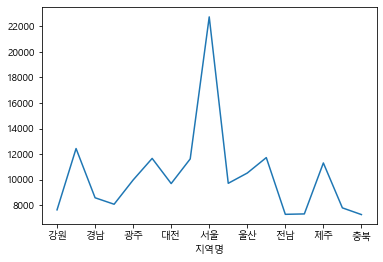

In [153]:
df.groupby(['지역명'])['평당분양가격'].mean().plot()

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

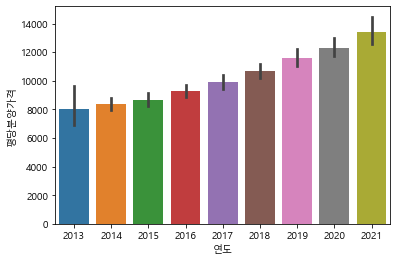

In [155]:
sns.barplot(data=df, x='연도', y='평당분양가격')

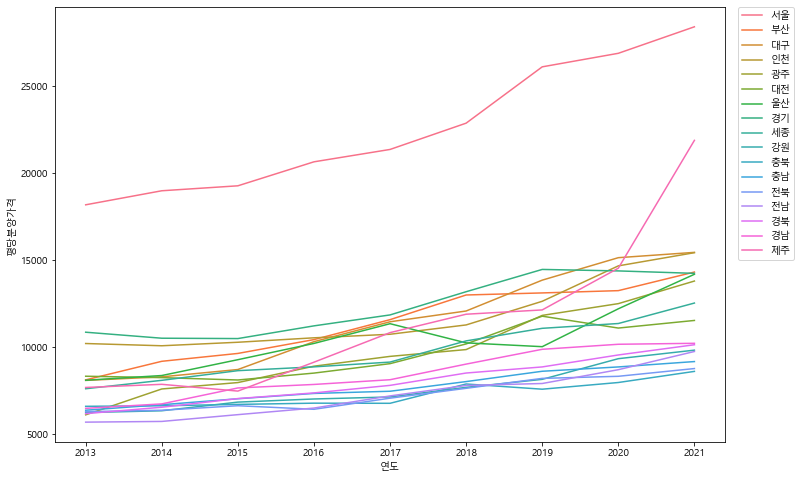

In [163]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='연도', y='평당분양가격', ci=None, hue='지역명')

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

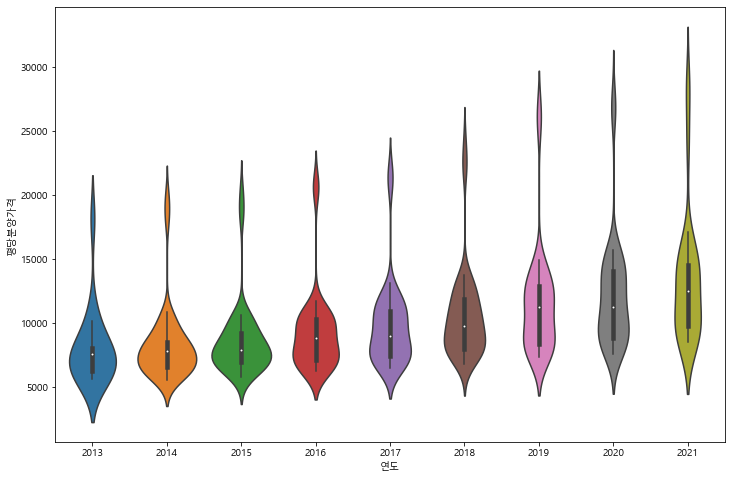

In [168]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='연도', y='평당분양가격')

# 4. 시각화 결과를 바탕으로 간단한 데이터 분석하기(주석으로 달기)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

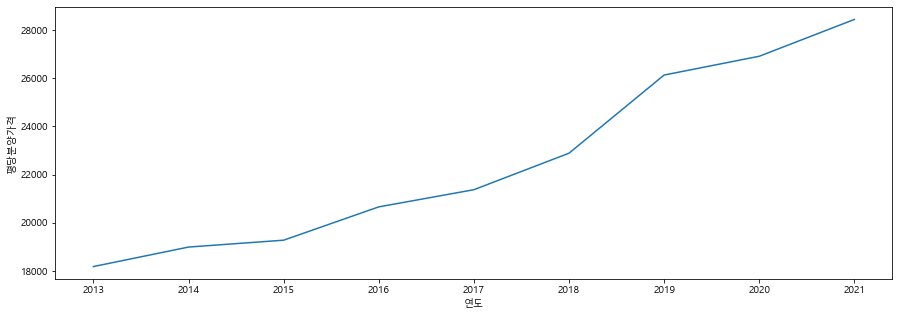

In [173]:
df_seoul = df[df['지역명']=='서울']
df_seoul

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_seoul, x='연도', y='평당분양가격', ci=None)

# 서울의 평당분양가격이 계속 오르고 있지만, 2018년도부터 2021년과 ㅂ